## IDEAS FOR VISUALIZATION

-> 1.) Which amino acid caused the largest drops in DMS scores in different datasets?

-> 2.) Which amino acid was the most resistant across the datasets?

-> 3.) Can a trend be observed within the best/worst substitution pairs? Could this be represented in a matrix?

In [46]:
import pandas as pd
import data_cleanup as dc
import matplotlib.pyplot as plt
import seaborn as sns
import domain_comparison as domc

In [47]:
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
gia_null_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv')
gia_wt_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv')
kot_hum: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Kotler_2018.csv')

In [48]:
gia_null_eto_amp: pd.DataFrame = dc.aufteilung_mut_pos(gia_null_eto)
gia_null_nut_amp: pd.DataFrame = dc.aufteilung_mut_pos(gia_null_eto)
gia_wt_nut_amp: pd.DataFrame = dc.aufteilung_mut_pos(gia_wt_nut)
kot_hum_amp: pd.DataFrame = dc.aufteilung_mut_pos(kot_hum)

-> 1.)

In [49]:
def calculate_average_dms_score(dataframe):
    grouped = dataframe.groupby('AS_new')
    sums = grouped['DMS_score'].sum()
    counts = grouped['DMS_score'].count()
    averages = sums / counts
    return averages

In [50]:
calculate_average_dms_score(gia_null_eto_amp)

AS_new
A    0.040377
C    0.285812
D   -0.129186
E   -0.090351
F    0.154333
G   -0.096411
H    0.065204
I    0.216295
K   -0.016256
L    0.066478
M    0.263048
N    0.109173
P   -0.393914
Q    0.051069
R   -0.089423
S    0.020455
T    0.069284
V    0.217156
W   -0.022369
Y    0.155812
Name: DMS_score, dtype: float64

In [51]:
calculate_average_dms_score(kot_hum_amp)

AS_new
A    1.946339
C    1.235049
D    1.092192
E    0.772340
F    1.049930
G    1.152665
H    1.374508
I    1.485982
K    1.347253
L    1.508440
M    1.591498
N    1.070850
P    0.840009
Q    1.481574
R    1.167633
S    1.439006
T    1.578345
V    1.520523
W    0.315421
Y    1.187766
Name: DMS_score, dtype: float64

In [52]:
calculate_average_dms_score(gia_null_nut_amp)

AS_new
A    0.040377
C    0.285812
D   -0.129186
E   -0.090351
F    0.154333
G   -0.096411
H    0.065204
I    0.216295
K   -0.016256
L    0.066478
M    0.263048
N    0.109173
P   -0.393914
Q    0.051069
R   -0.089423
S    0.020455
T    0.069284
V    0.217156
W   -0.022369
Y    0.155812
Name: DMS_score, dtype: float64

In [53]:
#DNA Binding Domain
dna_start = 102
dna_end = 292

In [54]:
dna_list = domc.slice_domain(gia_null_eto_amp, start= dna_start, end= dna_end)

In [55]:
calculate_average_dms_score(dna_list)

AS_new
A   -0.318680
C   -0.038414
D   -0.727194
E   -0.641335
F   -0.340764
G   -0.594019
H   -0.393229
I   -0.245627
K   -0.539991
L   -0.333689
M   -0.153077
N   -0.323157
P   -0.956817
Q   -0.424430
R   -0.545863
S   -0.271472
T   -0.339497
V   -0.175172
W   -0.642670
Y   -0.368845
Name: DMS_score, dtype: float64

-> 3.)

## GIA NULL ETO

In [56]:
fpathGNE = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
dfGNE = pd.read_csv(fpathGNE)
mutations_dfGNE = dc.aufteilung_mut_pos(dfGNE)
subs_df = mutations_dfGNE.groupby(["AS_old", "AS_new"])
mean_scoresGNE = subs_df.DMS_score.mean()
mean_scores_dfGNE = mean_scoresGNE.reset_index()
mean_substitutionsGNE = mean_scores_dfGNE.pivot(index="AS_old", columns="AS_new", values="DMS_score")
dc.rmv_na(mean_substitutionsGNE)

AS_new,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AS_old,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.398729,0.515101,0.457134,0.381672,0.012152,0.107080,0.322948,0.181169,0.010173,0.290941,0.243262,-0.118068,0.124772,0.116215,0.280331,0.476545,0.486577,0.223571,0.370961
C,-0.984361,0.000000,-1.510386,-1.416325,-0.191154,-0.942953,-1.161374,-0.309752,-1.349437,-1.293370,-0.735466,-0.871731,-1.376094,-0.883989,-0.514196,-0.447143,-0.752822,-0.561304,-0.678823,-0.587628
D,0.336420,0.364490,0.000000,0.538215,0.343919,0.203707,0.489931,0.101190,0.321578,0.181842,0.021296,0.259362,-0.054858,0.215632,-0.151917,0.347274,0.246090,0.173693,0.364983,0.389608
E,0.439452,0.382776,0.376245,0.000000,0.349576,0.067008,0.507057,0.371153,0.112546,0.306692,0.375952,0.362416,-0.331368,0.437464,-0.094437,0.272662,0.433548,0.375813,0.214914,0.379793
F,-0.689239,-0.378202,-1.367940,-0.864939,0.000000,-0.744887,-0.501397,-0.138207,-0.800865,0.000087,0.048709,-0.793803,-0.833767,-0.505582,-0.768096,-0.607131,-0.852016,-0.389713,-0.112035,0.159711
G,0.269993,0.523857,0.214476,0.018696,0.199421,0.000000,0.287239,-0.068060,0.080282,0.012710,0.233815,0.335321,-0.176705,0.319435,-0.072564,0.217142,0.137428,0.222302,-0.286193,0.127274
H,0.068617,0.244989,-0.059473,-0.118440,0.304758,-0.290995,0.000000,-0.201286,-0.285608,0.012453,0.339755,0.453583,-0.435685,0.313392,0.042533,-0.135786,-0.556795,-0.016774,0.313742,0.405657
I,-1.301357,-0.320707,-1.656635,-1.631776,-0.231583,-1.367628,-1.444026,0.000000,-1.430235,0.064510,0.607118,-0.923276,-1.309344,-1.550460,-1.285973,-0.986439,-0.416796,0.413857,-1.451584,-1.333389
K,0.564866,0.674043,0.163895,0.157561,0.335243,0.352034,0.540112,0.516667,0.000000,0.582710,0.639539,0.391722,0.327485,0.355389,0.278626,0.494709,0.537629,0.611187,0.388272,0.460607


## GIA NULL NUT

In [57]:
fpathGNN = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv'
dfGNN = pd.read_csv(fpathGNN)
mutations_dfGNN = dc.aufteilung_mut_pos(dfGNN)
subs_df = mutations_dfGNN.groupby(["AS_old", "AS_new"])
mean_scoresGNN = subs_df.DMS_score.mean()
mean_scores_dfGNN = mean_scoresGNN.reset_index()
mean_substitutionsGNN = mean_scores_dfGNN.pivot(index="AS_old", columns="AS_new", values="DMS_score")
dc.rmv_na(mean_substitutionsGNN)

AS_new,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AS_old,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.078327,0.244566,0.169060,-0.058282,-0.106636,-0.013274,0.237840,-0.143927,-0.366300,0.070607,0.256022,-0.349224,-0.138888,-0.363064,0.034978,0.420839,0.768976,0.129376,0.267792
C,-0.904938,0.000000,-1.227104,-1.007126,-0.309728,-0.700842,-0.985220,-0.750767,-0.923991,-1.243882,-0.553288,-0.541356,-1.258043,-0.728205,-0.369028,-0.395898,-0.750574,-0.714788,-0.517040,-0.373255
D,0.357713,0.637997,0.000000,0.454949,0.383448,0.077943,0.366449,0.287931,0.511465,0.083957,0.115951,0.253909,0.200032,0.316534,-0.190407,0.242251,0.056569,0.011055,0.422056,0.169037
E,0.433560,0.387517,0.214380,0.000000,0.549170,0.177539,0.415332,0.401761,0.099489,0.317878,0.376768,0.149748,-0.396260,0.368220,-0.154744,-0.075941,0.194525,0.450031,0.352510,0.343919
F,-0.586283,-0.205082,-0.704294,-0.228021,0.000000,-0.640930,-0.166780,-0.110838,-0.360682,-0.091401,0.076648,-0.443551,-0.771921,-0.596199,-0.563013,-0.694521,-0.600190,-0.461741,0.152672,0.268178
G,0.081981,0.368630,0.456395,0.194349,0.205881,0.000000,0.396782,-0.083650,-0.062472,0.118924,0.255556,0.013297,-0.240169,0.246879,-0.169996,0.144013,-0.020655,-0.038150,-0.093533,0.410915
H,0.076987,0.426408,0.358060,0.257900,0.459597,0.075430,0.000000,0.111314,0.121551,0.125978,0.532411,0.288078,-0.135417,0.346731,0.049622,-0.206268,-0.288462,0.117422,0.374084,0.311597
I,-0.949431,-0.164505,-1.275868,-1.252617,-0.489689,-1.127284,-1.180847,0.000000,-1.396062,-0.285888,0.172104,-0.708154,-1.287642,-0.867321,-1.130647,-0.928091,-0.395446,0.291312,-1.264791,-1.041534
K,0.580237,0.701513,0.263513,0.144287,0.573268,0.326639,0.547758,0.749445,0.000000,0.712105,1.003325,0.377861,0.472339,0.379008,0.091863,0.409501,0.725251,0.404792,0.687912,0.633145


## GIA WT NUT

In [58]:
fpathGWN = '../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv'
dfGWN = pd.read_csv(fpathGWN)
mutations_dfGWN = dc.aufteilung_mut_pos(dfGWN)
subs_df = mutations_dfGWN.groupby(["AS_old", "AS_new"])
mean_scoresGWN = subs_df.DMS_score.mean()
mean_scores_dfGWN = mean_scoresGWN.reset_index()
mean_substitutionsGWN = mean_scores_dfGWN.pivot(index="AS_old", columns="AS_new", values="DMS_score")
dc.rmv_na(mean_substitutionsGWN)

AS_new,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AS_old,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.523115,0.178431,0.139494,0.286022,0.229834,0.274848,0.290237,0.579289,0.266825,0.479781,0.454057,0.102224,0.444860,0.359888,0.149727,-0.014204,0.035522,0.277756,0.307947
C,-0.605004,0.000000,-1.577181,-1.634369,-0.881717,-1.361588,-1.302125,-1.201038,-1.293330,-0.905950,-1.127292,-1.401702,-1.714673,-1.441304,-1.143114,-0.770554,-0.924323,-0.975020,-1.280878,-1.224153
D,0.125410,0.466483,0.000000,-0.014048,0.194293,0.004801,0.172913,0.336739,0.103900,0.317898,0.289718,-0.092914,0.056480,0.264664,0.135072,0.347205,0.354831,0.145293,0.392202,-0.097125
E,0.105343,0.214563,0.093924,0.000000,0.191253,-0.039416,0.258991,0.159424,-0.286280,0.153631,0.191815,0.151225,0.077023,0.190029,0.076308,0.292590,0.297555,0.003196,0.008434,0.149550
F,-0.078118,-0.148582,0.031480,-0.163003,0.000000,-0.021875,0.193304,-0.189181,0.070949,-0.128228,0.090547,-0.081460,-0.007818,0.262348,0.035913,-0.243032,-0.062412,-0.025901,0.111662,0.053251
G,0.024028,0.235513,0.116393,-0.121849,0.150026,0.000000,0.263418,-0.185367,0.192168,-0.071164,0.112811,0.175703,-0.139193,0.265418,-0.283921,0.049340,0.095272,-0.247706,-0.291610,0.121850
H,-0.344390,-0.188873,-0.409853,-0.355624,-0.016003,-0.711794,0.000000,-0.485958,-0.585235,-0.434077,0.086811,-0.366218,-0.465998,-0.427394,-0.529698,-0.462322,-0.373978,-0.389864,-0.253486,-0.419294
I,-0.966927,-0.155396,-1.013349,-1.008892,-0.688332,-1.031114,-0.676350,0.000000,-0.871301,-0.043644,-0.092969,-0.972704,-1.098377,-0.806713,-0.746627,-0.707581,-0.553906,-0.093010,-0.976286,-0.799155
K,0.567697,0.645280,0.786966,0.095903,0.517961,0.542534,0.733215,0.545647,0.000000,0.488479,0.479614,0.153840,0.657456,0.470217,0.165027,0.825451,0.375979,0.748016,0.586887,0.531492


## KOT HUM

In [59]:
fpathKH = '../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv'
dfKH = pd.read_csv(fpathKH)
mutations_dfKH = dc.aufteilung_mut_pos(dfKH)
subs_df = mutations_dfKH.groupby(["AS_old", "AS_new"])
mean_scoresKH = subs_df.DMS_score.mean()
mean_scores_dfKH = mean_scoresKH.reset_index()
mean_substitutionsKH = mean_scores_dfKH.pivot(index="AS_old", columns="AS_new", values="DMS_score")
dc.rmv_na(mean_substitutionsKH)

AS_new,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AS_old,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.523115,0.178431,0.139494,0.286022,0.229834,0.274848,0.290237,0.579289,0.266825,0.479781,0.454057,0.102224,0.444860,0.359888,0.149727,-0.014204,0.035522,0.277756,0.307947
C,-0.605004,0.000000,-1.577181,-1.634369,-0.881717,-1.361588,-1.302125,-1.201038,-1.293330,-0.905950,-1.127292,-1.401702,-1.714673,-1.441304,-1.143114,-0.770554,-0.924323,-0.975020,-1.280878,-1.224153
D,0.125410,0.466483,0.000000,-0.014048,0.194293,0.004801,0.172913,0.336739,0.103900,0.317898,0.289718,-0.092914,0.056480,0.264664,0.135072,0.347205,0.354831,0.145293,0.392202,-0.097125
E,0.105343,0.214563,0.093924,0.000000,0.191253,-0.039416,0.258991,0.159424,-0.286280,0.153631,0.191815,0.151225,0.077023,0.190029,0.076308,0.292590,0.297555,0.003196,0.008434,0.149550
F,-0.078118,-0.148582,0.031480,-0.163003,0.000000,-0.021875,0.193304,-0.189181,0.070949,-0.128228,0.090547,-0.081460,-0.007818,0.262348,0.035913,-0.243032,-0.062412,-0.025901,0.111662,0.053251
G,0.024028,0.235513,0.116393,-0.121849,0.150026,0.000000,0.263418,-0.185367,0.192168,-0.071164,0.112811,0.175703,-0.139193,0.265418,-0.283921,0.049340,0.095272,-0.247706,-0.291610,0.121850
H,-0.344390,-0.188873,-0.409853,-0.355624,-0.016003,-0.711794,0.000000,-0.485958,-0.585235,-0.434077,0.086811,-0.366218,-0.465998,-0.427394,-0.529698,-0.462322,-0.373978,-0.389864,-0.253486,-0.419294
I,-0.966927,-0.155396,-1.013349,-1.008892,-0.688332,-1.031114,-0.676350,0.000000,-0.871301,-0.043644,-0.092969,-0.972704,-1.098377,-0.806713,-0.746627,-0.707581,-0.553906,-0.093010,-0.976286,-0.799155
K,0.567697,0.645280,0.786966,0.095903,0.517961,0.542534,0.733215,0.545647,0.000000,0.488479,0.479614,0.153840,0.657456,0.470217,0.165027,0.825451,0.375979,0.748016,0.586887,0.531492


In [60]:
def hmap(frame: pd.DataFrame) -> None:
    frame_reset = frame.reset_index()  # Reset index to make 'AS_new' a column
    hmap_frame = frame_reset.pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')
    plt.figure(figsize=(50, 8))
    sns.set(font_scale=2)
    sns.heatmap(hmap_frame, cmap='seismic')
    plt.title('DMS Scores for Mutations')
    plt.show()
    return None



In [61]:
mean_substitutionsGNE.head(20)

AS_new,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
AS_old,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.398729,0.515101,0.457134,0.381672,0.012152,0.107080,0.322948,0.181169,0.010173,0.290941,0.243262,-0.118068,0.124772,0.116215,0.280331,0.476545,0.486577,0.223571,0.370961
C,-0.984361,0.000000,-1.510386,-1.416325,-0.191154,-0.942953,-1.161374,-0.309752,-1.349437,-1.293370,-0.735466,-0.871731,-1.376094,-0.883989,-0.514196,-0.447143,-0.752822,-0.561304,-0.678823,-0.587628
D,0.336420,0.364490,0.000000,0.538215,0.343919,0.203707,0.489931,0.101190,0.321578,0.181842,0.021296,0.259362,-0.054858,0.215632,-0.151917,0.347274,0.246090,0.173693,0.364983,0.389608
E,0.439452,0.382776,0.376245,0.000000,0.349576,0.067008,0.507057,0.371153,0.112546,0.306692,0.375952,0.362416,-0.331368,0.437464,-0.094437,0.272662,0.433548,0.375813,0.214914,0.379793
F,-0.689239,-0.378202,-1.367940,-0.864939,0.000000,-0.744887,-0.501397,-0.138207,-0.800865,0.000087,0.048709,-0.793803,-0.833767,-0.505582,-0.768096,-0.607131,-0.852016,-0.389713,-0.112035,0.159711
G,0.269993,0.523857,0.214476,0.018696,0.199421,0.000000,0.287239,-0.068060,0.080282,0.012710,0.233815,0.335321,-0.176705,0.319435,-0.072564,0.217142,0.137428,0.222302,-0.286193,0.127274
H,0.068617,0.244989,-0.059473,-0.118440,0.304758,-0.290995,0.000000,-0.201286,-0.285608,0.012453,0.339755,0.453583,-0.435685,0.313392,0.042533,-0.135786,-0.556795,-0.016774,0.313742,0.405657
I,-1.301357,-0.320707,-1.656635,-1.631776,-0.231583,-1.367628,-1.444026,0.000000,-1.430235,0.064510,0.607118,-0.923276,-1.309344,-1.550460,-1.285973,-0.986439,-0.416796,0.413857,-1.451584,-1.333389
K,0.564866,0.674043,0.163895,0.157561,0.335243,0.352034,0.540112,0.516667,0.000000,0.582710,0.639539,0.391722,0.327485,0.355389,0.278626,0.494709,0.537629,0.611187,0.388272,0.460607


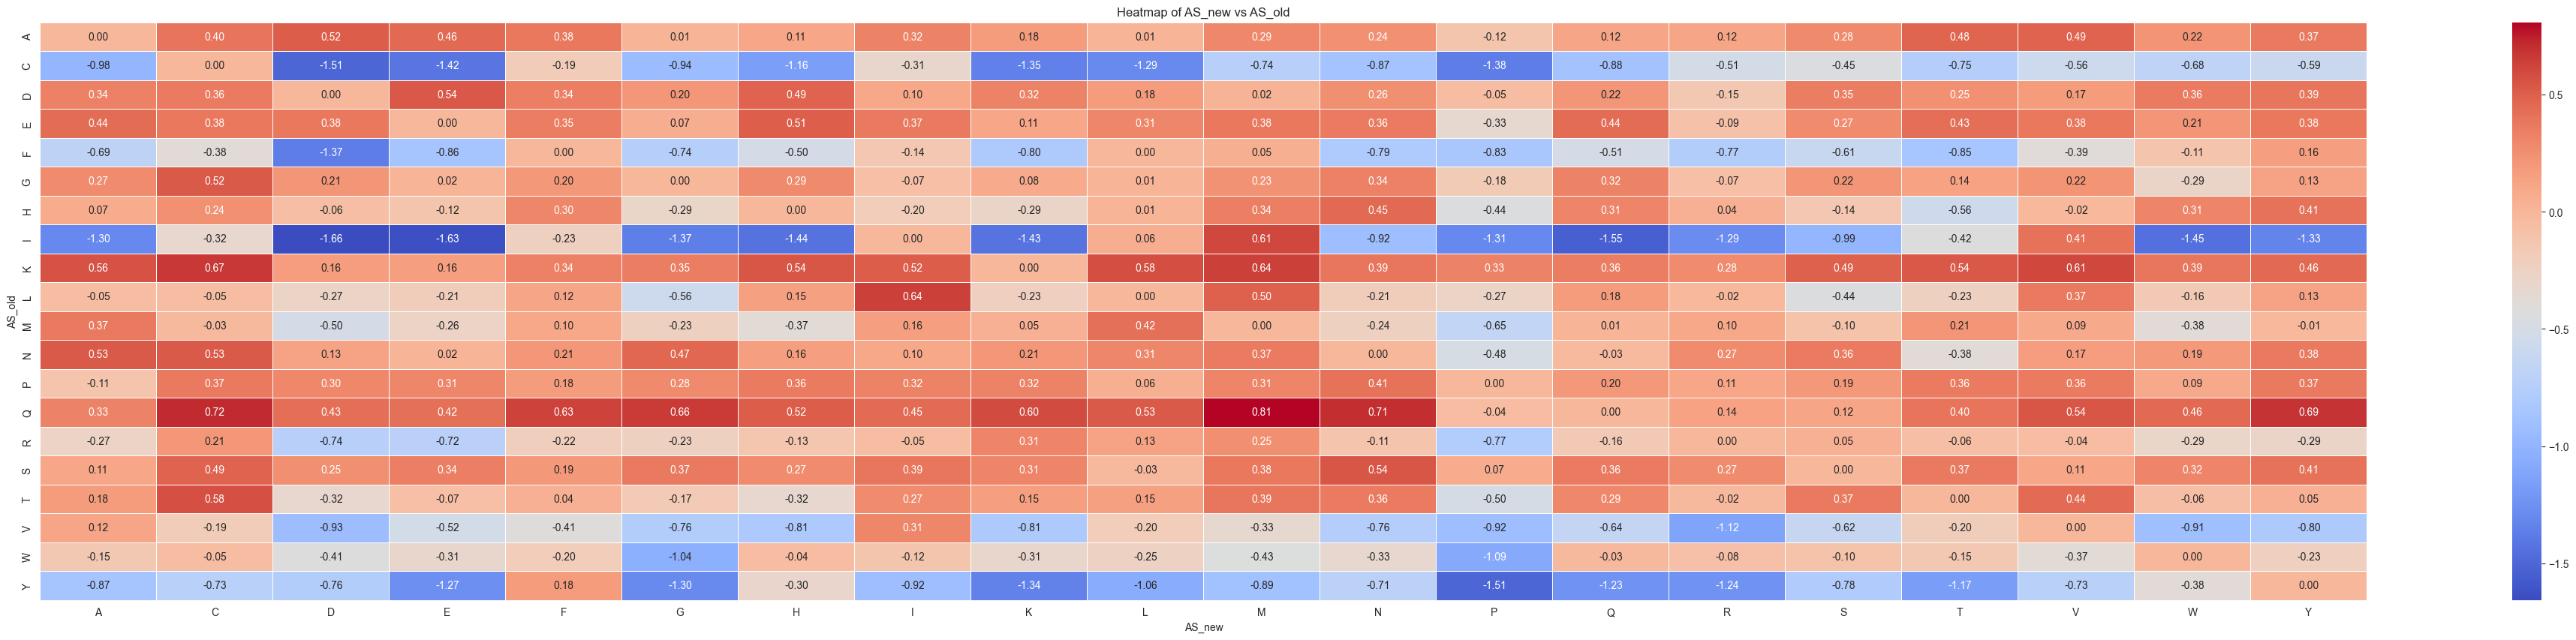

In [62]:
df = mean_substitutionsGNE
plt.figure(figsize=(50, 10))
sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of AS_new vs AS_old')
plt.xlabel('AS_new')
plt.ylabel('AS_old')

plt.show()

In [63]:
def hmap_mean_variance (dataframe: pd.DataFrame) -> None:
    plt.figure(figsize=(50, 10))
    sns.heatmap(dataframe, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
    plt.title('Heatmap of AS_new vs AS_old')
    plt.xlabel('AS_new')
    plt.ylabel('AS_old')
    plt.show()
    return None

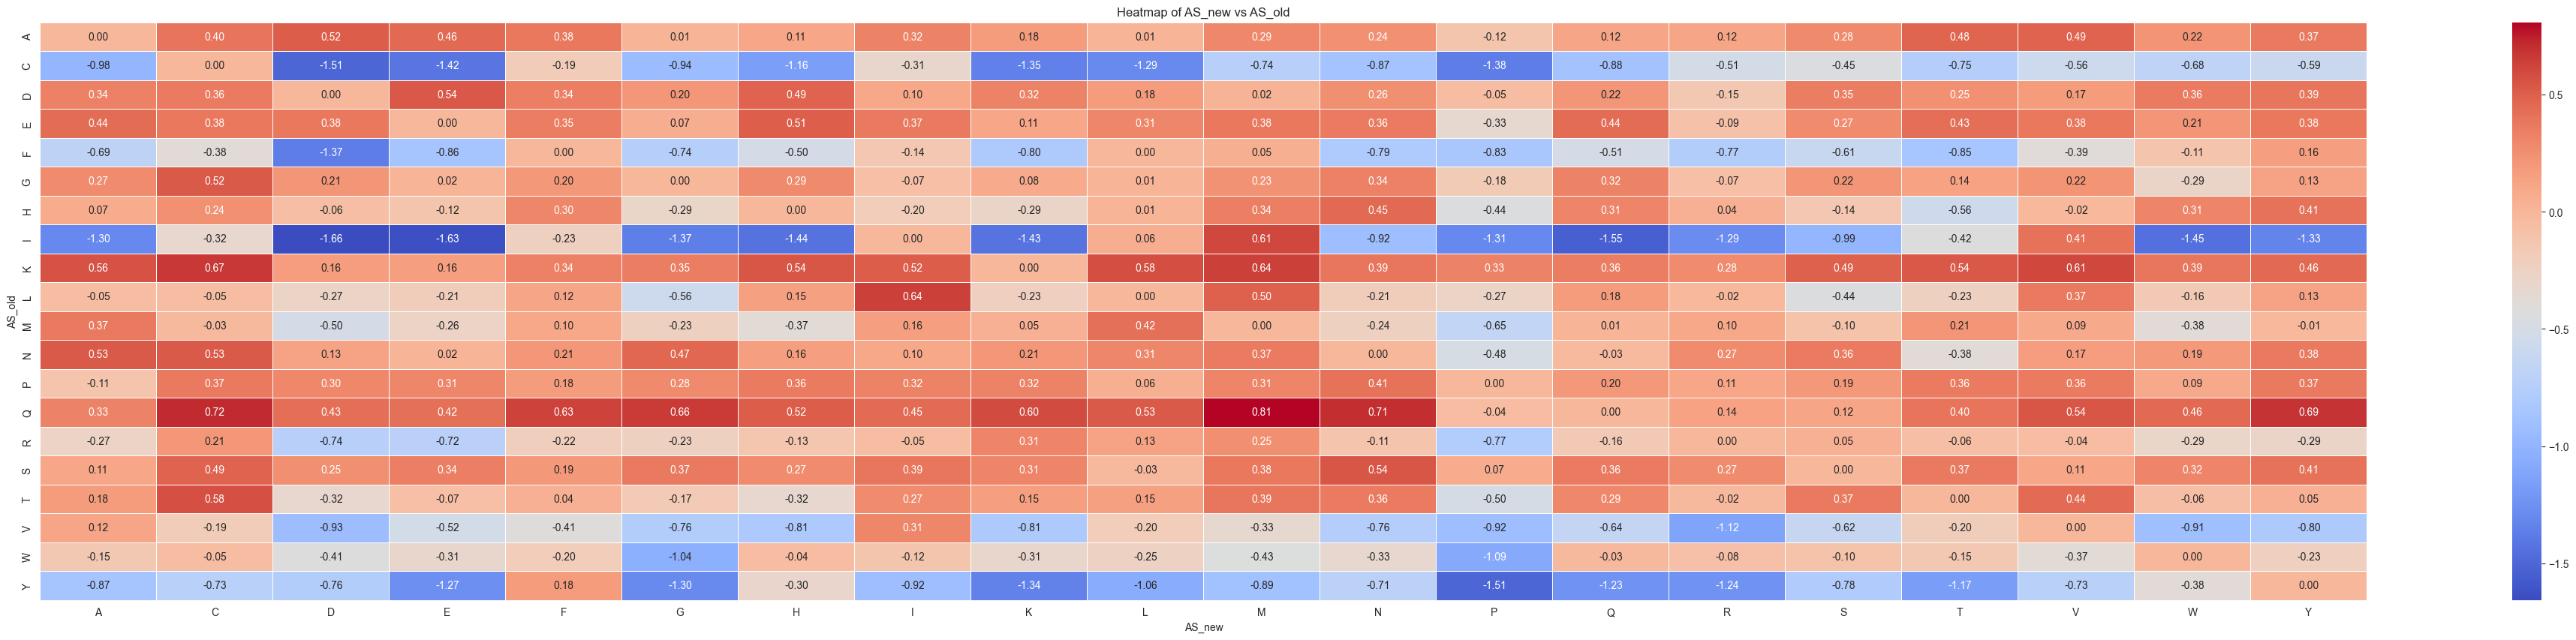

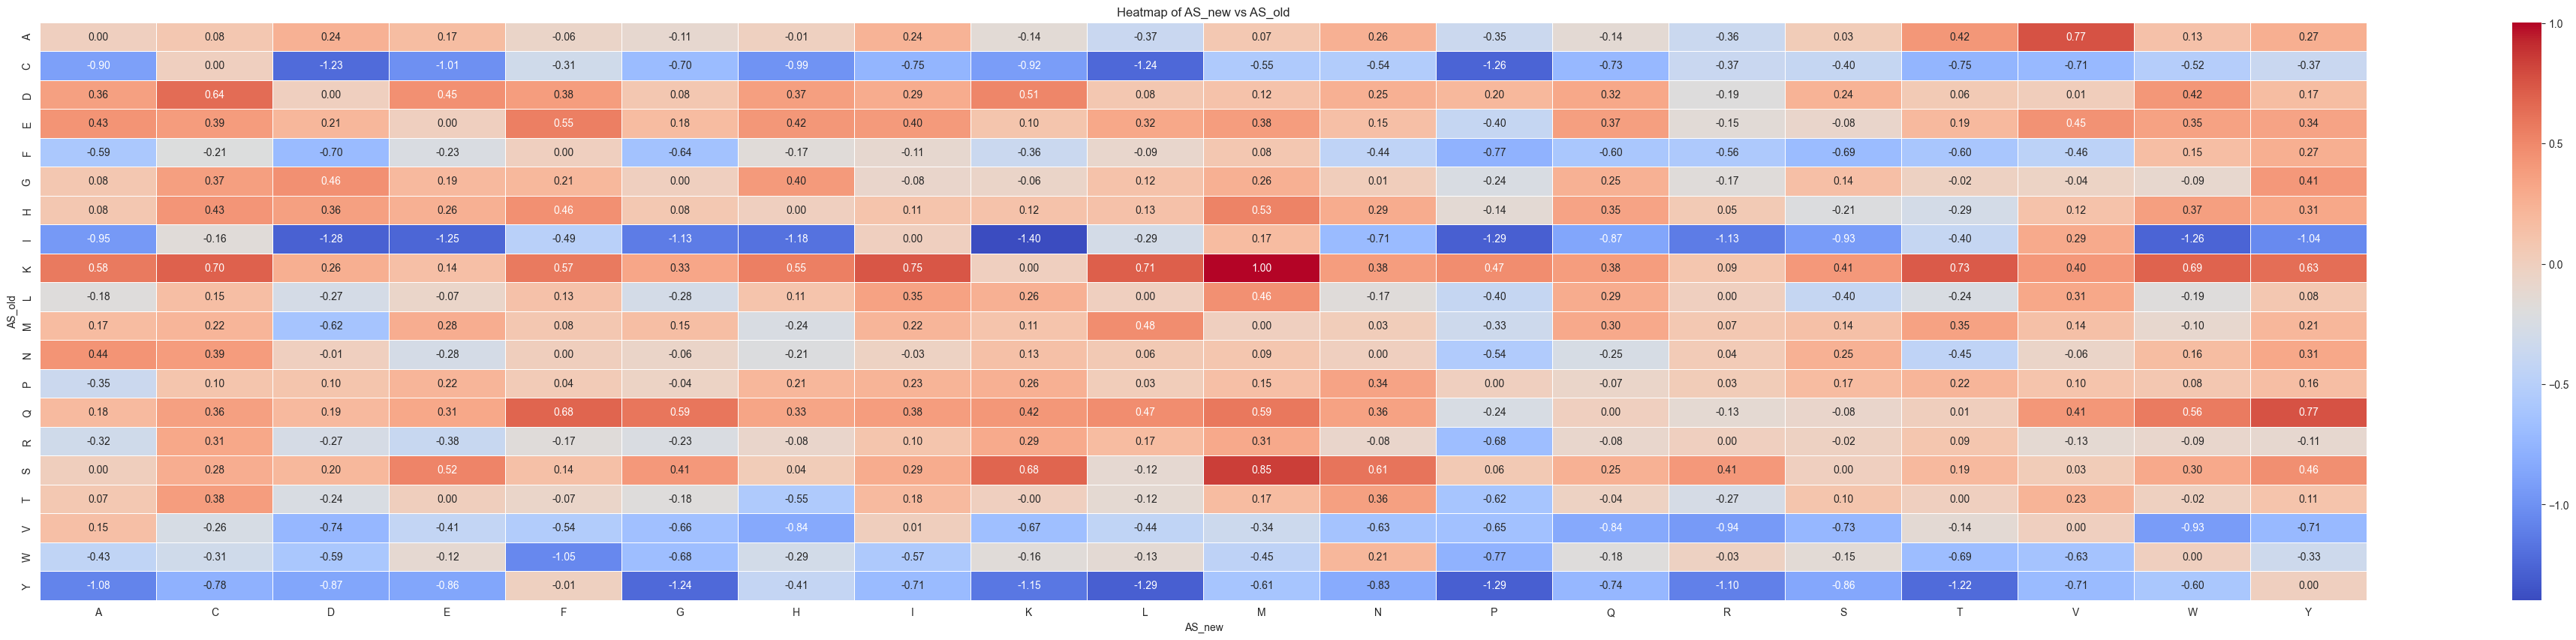

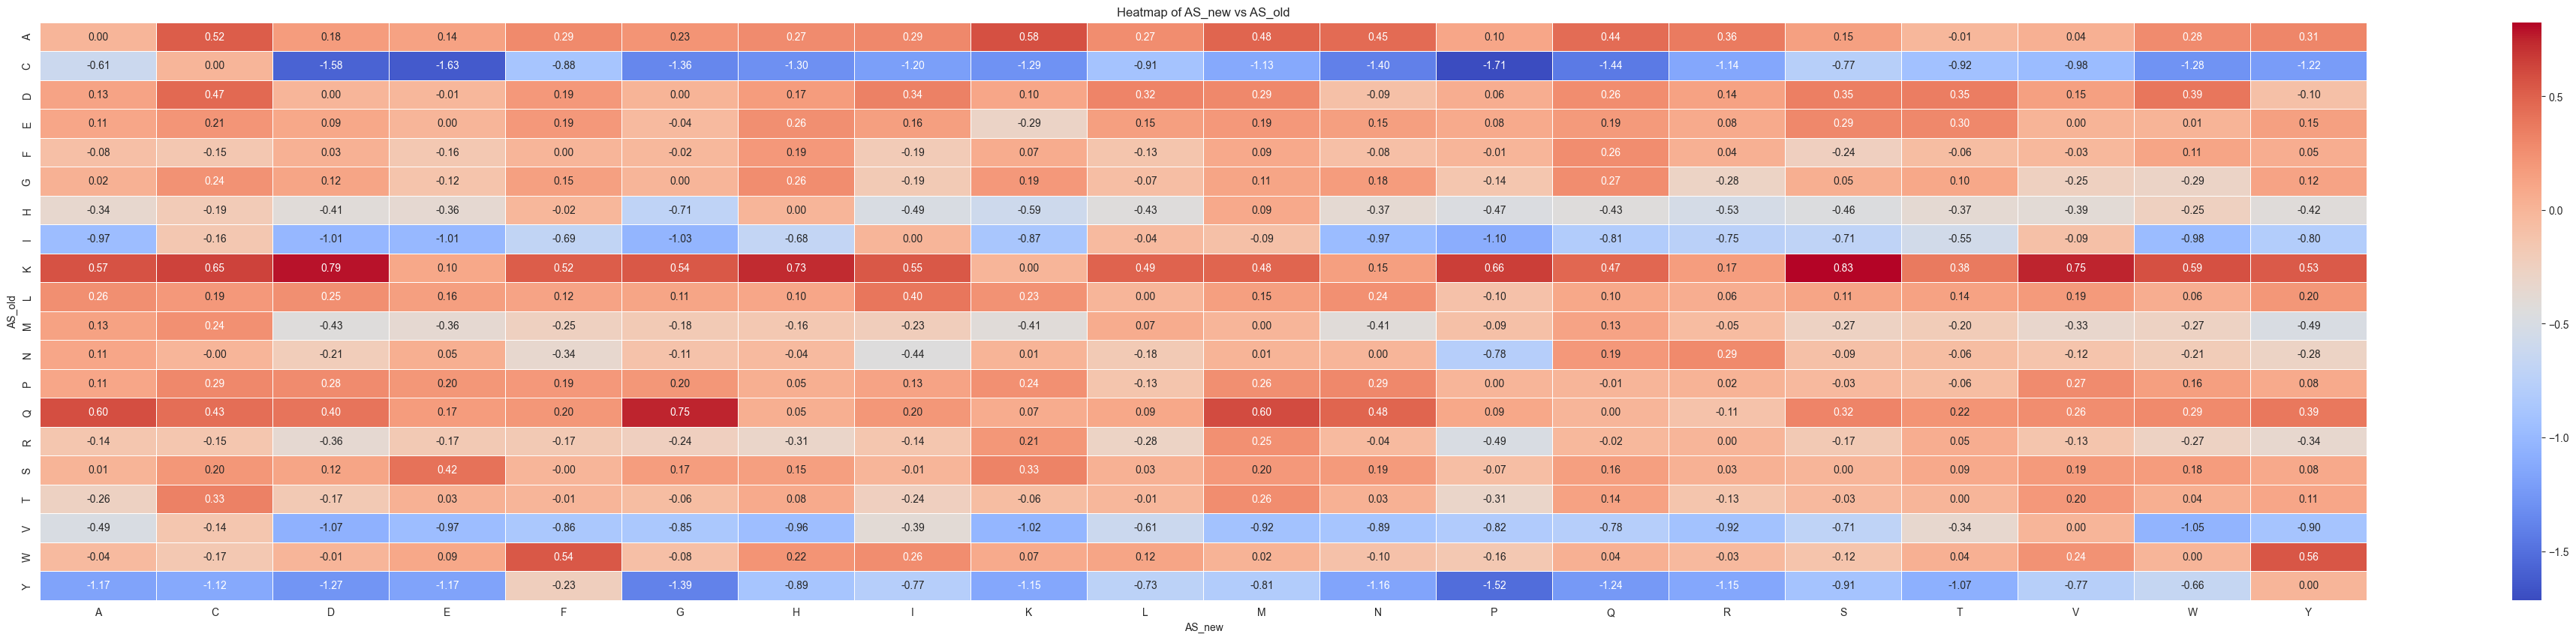

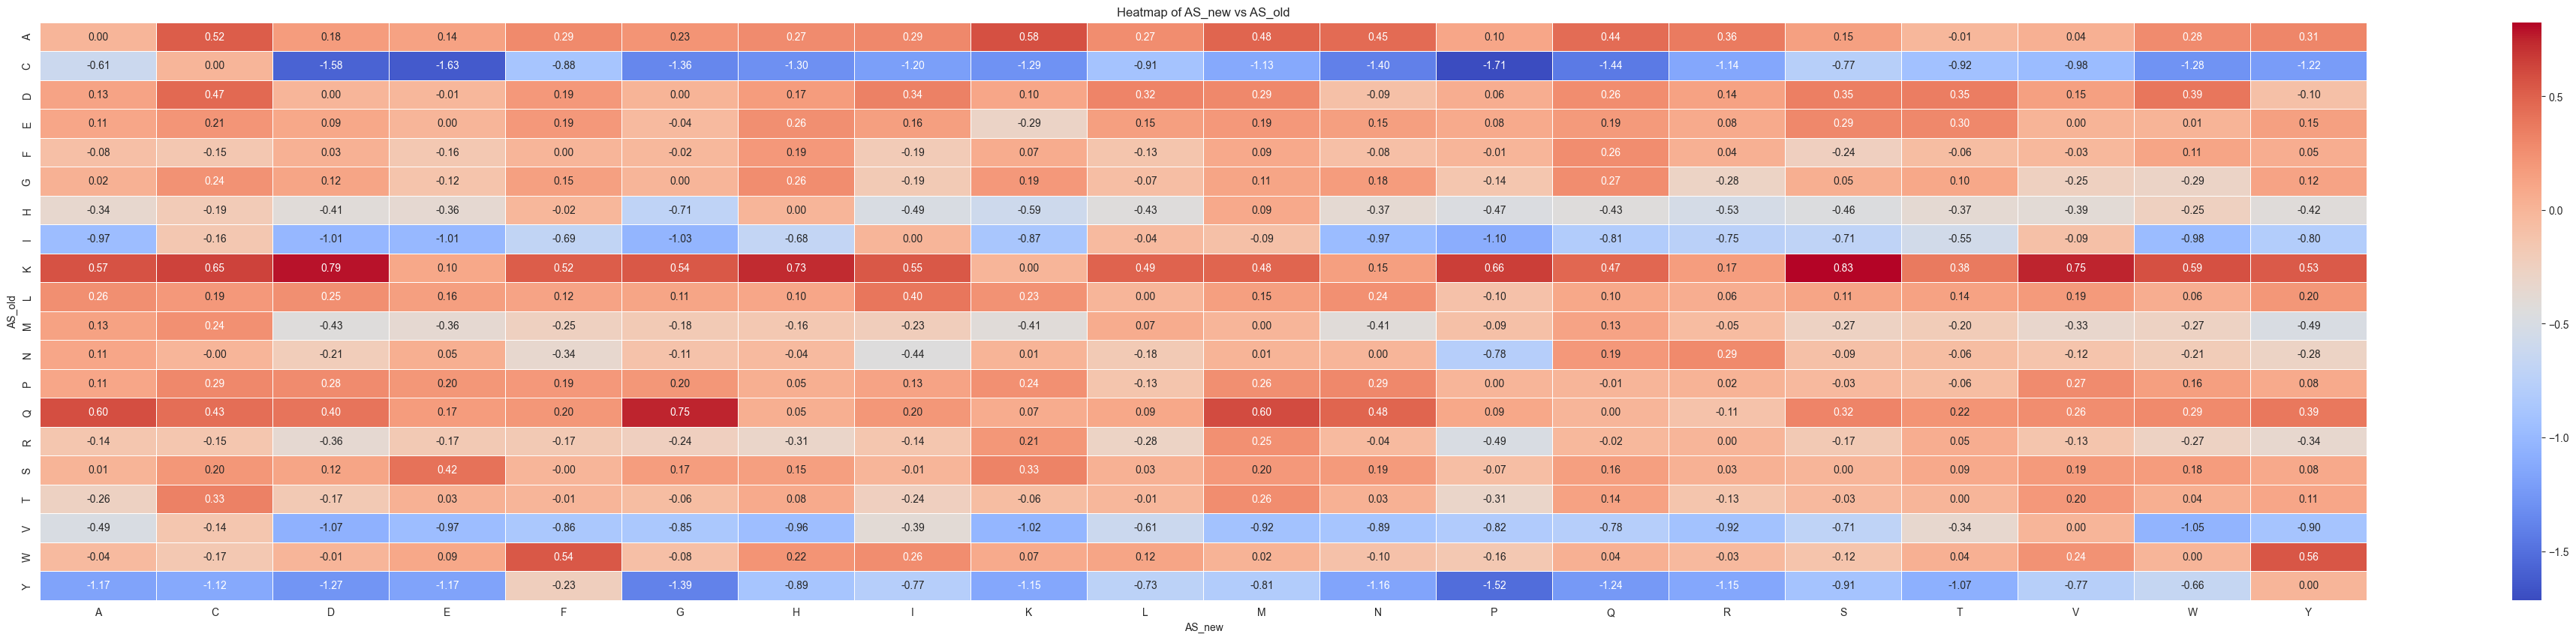

In [64]:
hmap_mean_variance(mean_substitutionsGNE)
hmap_mean_variance(mean_substitutionsGNN)
hmap_mean_variance(mean_substitutionsGWN)
hmap_mean_variance(mean_substitutionsKH)

In [65]:
gia_null_eto_amp.head(20)

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position_mut,AS_old,AS_new
0,M1A,AEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.788753,0,1,M,A
1,M1C,CEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-1.969077,0,1,M,C
2,M1Y,YEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-1.333315,0,1,M,Y
3,M1W,WEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-2.219256,0,1,M,W
4,M1V,VEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.669727,0,1,M,V
5,M1T,TEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-0.380537,1,1,M,T
6,M1R,REEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-1.470598,0,1,M,R
7,M1Q,QEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-2.474317,0,1,M,Q
8,M1P,PEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-1.873279,0,1,M,P
9,M1S,SEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,-2.733926,0,1,M,S


In [66]:
def calculate_average_dms_score_old(dataframe):
    grouped = dataframe.groupby('AS_old')
    sums = grouped['DMS_score'].sum()
    counts = grouped['DMS_score'].count()
    averages = sums / counts
    return averages


In [67]:
calculate_average_dms_score_old(gia_null_eto_amp)

AS_old
A    0.256909
C   -0.872016
D    0.246971
E    0.281014
F   -0.533648
G    0.136625
H    0.020981
I   -0.923985
K    0.440647
L   -0.031680
M   -0.066090
N    0.183329
P    0.252720
Q    0.479084
R   -0.165046
S    0.291878
T    0.095037
V   -0.551873
W   -0.299550
Y   -0.894989
Name: DMS_score, dtype: float64

In [68]:
def calculate_average_dms_score_old(*args):
    results = {}

    for arg in args:
        df_name = arg[0]
        df = arg[1]
        grouped = df.groupby('AS_old')
        sums = grouped['DMS_score'].sum()
        counts = grouped['DMS_score'].count()
        averages = sums / counts
        results[df_name] = averages

    result_df = pd.DataFrame(results)
    return result_df

In [69]:
calculate_average_dms_score_old(('GNE', gia_null_eto_amp), ('GNN', gia_null_nut_amp), ('GWN', gia_wt_nut_amp), ('KH', kot_hum_amp))


,GNE,GNN,GWN,KH
AS_old,,,,
A,0.256909,0.256909,0.282403,1.500674
C,-0.872016,-0.872016,-1.198174,0.833954
D,0.246971,0.246971,0.184411,1.694411
E,0.281014,0.281014,0.120482,1.504093
F,-0.533648,-0.533648,-0.015798,0.547829
G,0.136625,0.136625,0.024270,1.038537
H,0.020981,0.020981,-0.375434,1.056399
I,-0.923985,-0.923985,-0.700139,0.830110
K,0.440647,0.440647,0.521982,1.474162


In [70]:
#this function shows us the aminoacids that, when mutated into, caused the greatest dropoff/increase of the DMS score